### gumbel-max trick ###
对Categorical分布$(\alpha_1, \alpha_2, ..., \alpha_n)$采样，等价于采样$G_k \sim Gumbel(0, 1), for \space k = 1,2,...,n$

其中，$G_k$可通过$G_k = -log(-log(U)), U \sim Uniform(0, 1)$得到

取$x = \mathop{\arg\max}\limits_{k}{(log\alpha_k + G_k)}$，即可得到Categorical分布的采样结果

### gumbel-softmax trick [1] [2] ###
将上述$\arg\max$操作换成softmax近似，即：

取$ \Large x = \frac{{exp}^{(log\alpha_k + G_k)/\lambda}}{\sum_i^n{{exp}^{(log\alpha_i + G_i)/\lambda} } }$

其中$\lambda$为温度超参

具体推导过程参照文献[1]（Concrete Distribution）、文献[2]（Gumbel-Softmax）

### gumbel-softmax binary case [1] ###
当$n = 2$，即分布为Bernoulli分布时，特殊讨论

假设，Bernoulli分布参数为$p$, 参照对Categorical分布的表示为：$(\alpha_1,\alpha_2)$，其中$\alpha_1 = p, \alpha_2 = 1 - p$

采用得到$1$的概率为$\large \frac{\alpha_1}{\alpha_1 + \alpha_2}$，等价于$\Large \frac{\frac{\alpha_1}{\alpha_2}}{\frac{\alpha_1}{\alpha_2} + 1}$

令$\large \alpha = \frac{\alpha_1}{\alpha_2}$，则分布可表示为：$\large (\frac{\alpha_1}{\alpha_2}, 1)$


应用gumbel-softmax trick，即：
取
$$
\Large
\begin{aligned}
x &= \frac{{exp}^{(log\alpha + G_1)/\lambda}}{{exp}^{(log\alpha + G_1)/\lambda} + {exp}^{(log 1 + G_2)/\lambda}} \\
&= \frac{{exp}^{(log\alpha + G_1)/\lambda}}{{exp}^{(log\alpha + G_1)/\lambda} + {exp}^{G_2/\lambda}} \\
&= \frac{{exp}^{(log\alpha + G_1 - G_2)/\lambda}}{{exp}^{(log\alpha + G_1 - G2)/\lambda} + 1} \\
&= \frac{1}{1 + {exp}^{-(log\alpha + G_1 - G2)/\lambda}} \\
&= \sigma(log\alpha + L)
\end{aligned}
$$

其中，$\sigma$代表$sigmoid$，$L$服从$Logistic $分布，$L \sim Logistic$。（两个Gumbel分布之差服从Logistic分布，推导过程参照《gumbel性质推导.pdf》）



### gumbel-softmax binary case 改进 [3] ###
上述gumbel-softmax binary case采样得到的样本在，$(0, 1)$区间，取不到$\{0, 1\}$值，文献[3]在此基础的上进行了改进，使得采样得到的样本包括$\{0, 1\}$，具体如下：
$$
\Large
\begin{aligned}
&x = \sigma(log\alpha + L)，原始采样 \\
&\bar{x} = x * (\zeta - \gamma) + \gamma，延伸到(\zeta, \gamma)区间 \\
&z = min(1, max(0, \bar{x}))，截断到[0, 1]之间 \\ 
\end{aligned}
$$


### 超参讨论 ###
在binary case中，可取$\lambda = 1/2，2/3$。先验和后验的$\lambda$可以不一样。

文献[1]原文描述：

Appendix C.4 CHOOSING THE TEMPERATURE

We found in the cases $n = 4$ that $\lambda = 1$ was the best temperature and in $n = 8$,  $\lambda = 2/3$ was the best. Yet $\lambda= 2/3$ was the best single performing temperature across the $n \in \{2, 4, 8\}$ cases that we considered



Appendix D.5 HYPERPARAMETER SELECTION

We found it valuable to have different values for the prior and posterior distributions. In particular, for binary we found that (prior $\lambda_2 = 1/2$, posterior $\lambda_1 = 2/3$) was best, for 4-ary we found (prior $\lambda_2 = 2/3$, posterior $\lambda_1 = 1$) was best, and (prior $\lambda_2 = 2/5$, posterior  $\lambda_1 = 2/3$) for 8-ary. No temperature annealing was used.


### Cheat Sheet [1] ###
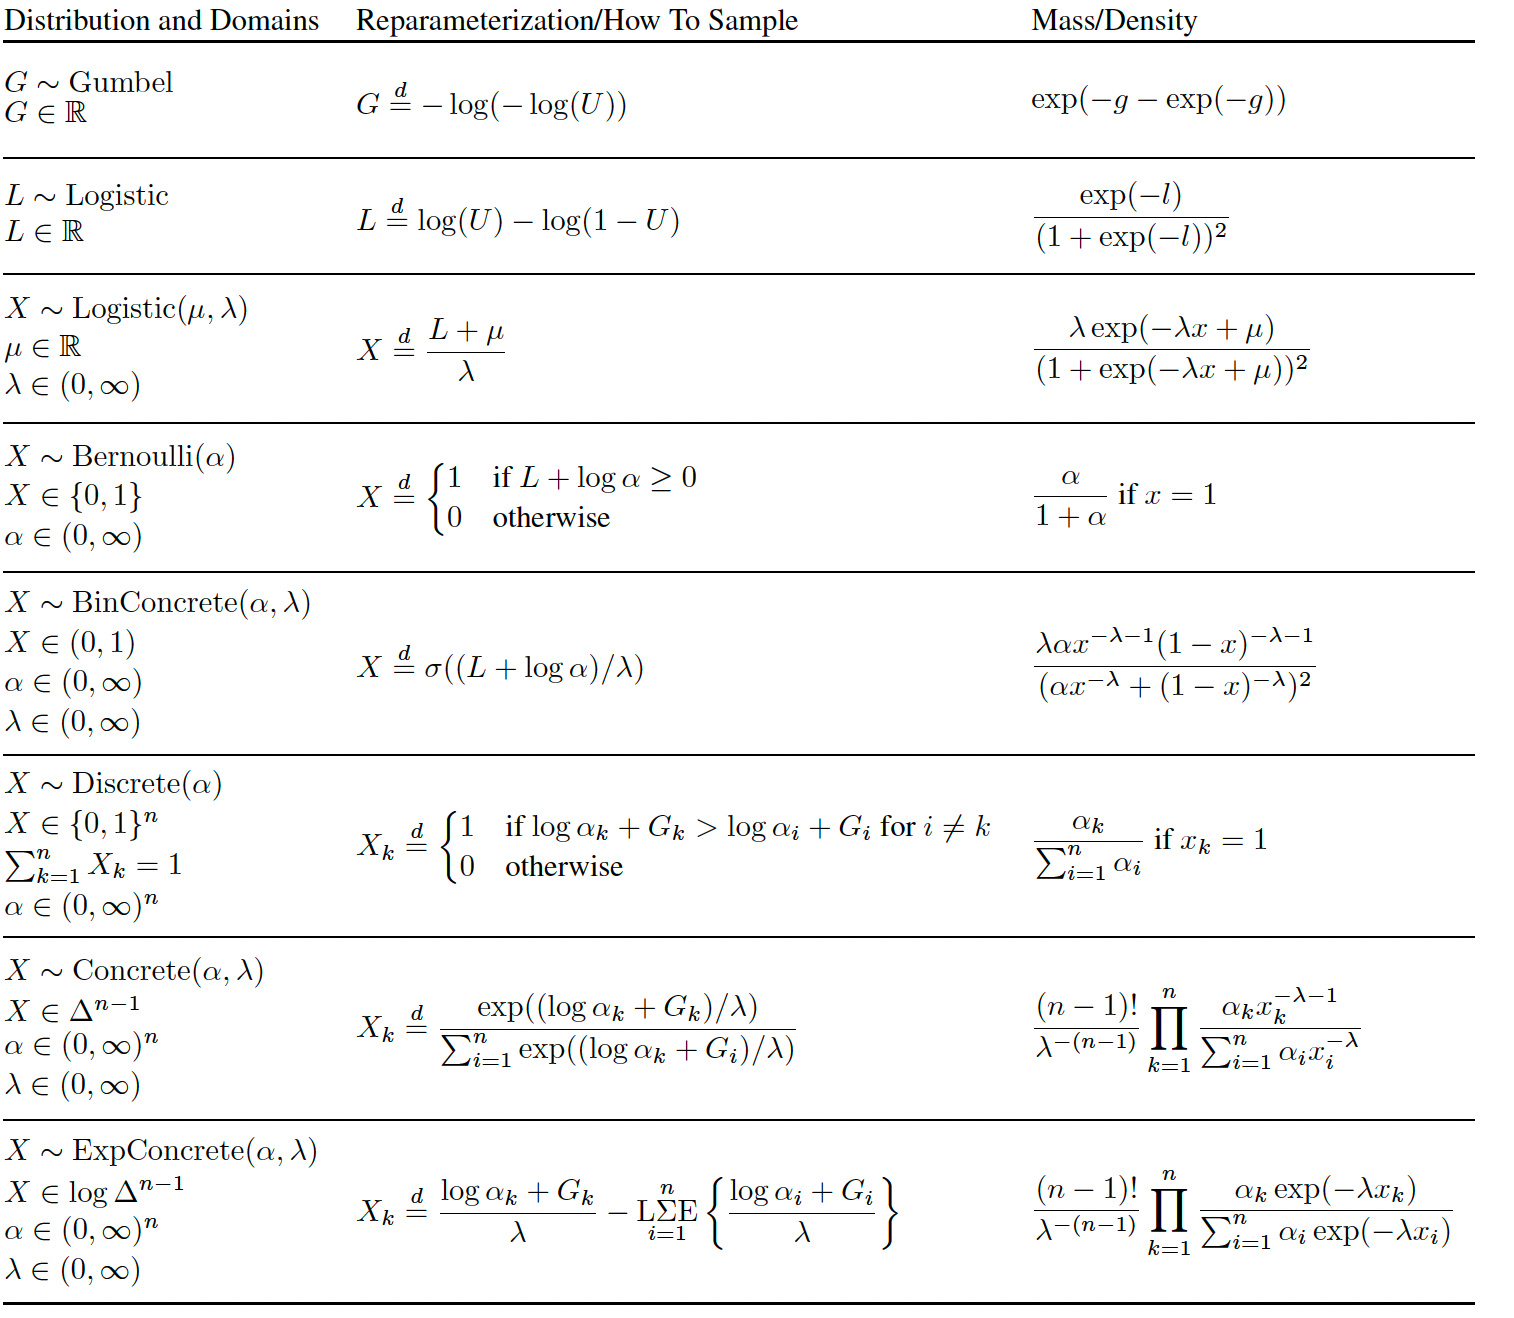

### 参考文献 ###
[1] Maddison C J, Mnih A, Teh Y W. The concrete distribution: A continuous relaxation of discrete random variables[J]. arXiv preprint arXiv:1611.00712, 2016.

[2] Jang E, Gu S, Poole B. Categorical reparameterization with gumbel-softmax[J]. arXiv preprint arXiv:1611.01144, 2016.

[3] Louizos C, Welling M, Kingma D P. Learning sparse neural networks through $ L_0 $ regularization[J]. arXiv preprint arXiv:1712.01312, 2017.